In [ ]:
# 패키지 설치
!pip install yfinance --quiet

In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

## 데이터셋 준비

총 9개 ETF에 대한 가격 데이터를 다운받아오도록 하겠습니다. 여기서 사용하게 될 데이터는 전부 주간 단위 데이터입니다. 

In [2]:
# ETF 데이터 다운로드
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)
data.drop(['Open', 'High', 'Low', 'Volume'], inplace=True, axis=1)
data = data.droplevel(0, axis=1).resample('W').last()

[*********************100%***********************]  9 of 9 completed


In [3]:
# 수익률 계산
rets = data.pct_change().fillna(0)

### 동일 비중 포트폴리오

<Axes: xlabel='Date'>

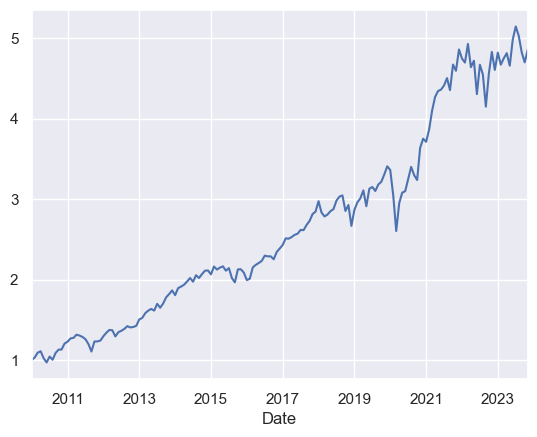

In [4]:
# EW 포트폴리오 수익률
port_rets = rets.mean(axis=1)

# 백테스팅 결과
(1 + port_rets).cumprod().plot()

### 고정 비중 구현

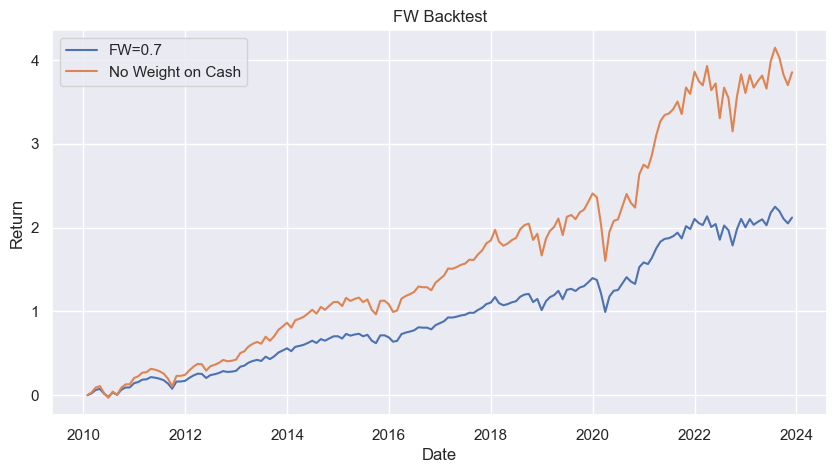

In [5]:
# 고정 비중 70% = 현금 비중 30%
fw_weights = 0.7

# 포트폴리오 수익률
fw_rets = fw_weights * port_rets

# 포트폴리오 누적수익률
fw_cum_rets = (1 + fw_rets).cumprod() - 1

# 기존 포트폴리오 누적수익률
port_cum_rets = (1 + port_rets).cumprod() - 1

# 백테스팅 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(fw_cum_rets, label=f'FW={fw_weights}')
plt.plot(port_cum_rets, label='No Weight on Cash')
plt.title('FW Backtest')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()

Copyright 2022. 퀀트대디. All rights reserved.